# LinkedGen LinkedIn Post Dataset - Exploratory Data Analysis (EDA)

This notebook provides an exploratory data analysis (EDA) of the processed LinkedIn post dataset. We analyze the train and validation splits, visualize distributions, and explore key patterns in the data.

## 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plotting style
sns.set(style='whitegrid')
%matplotlib inline

## 2. Load Train and Validation Data

In [3]:
# Define data paths
train_path = os.path.join('..', 'data', 'train.csv')
val_path = os.path.join('..', 'data', 'val.csv')

# Load datasets
train_df = pd.read_csv(train_path, names=["text", "category", "tone"], header=None)
val_df = pd.read_csv(val_path, names=["text", "category", "tone"], header=None)

print('Train set:')
display(train_df.head())
print('Validation set:')
display(val_df.head())

Train set:


,text,category,tone
0,Just finished a workshop on MLOps. Already thi...,Learning,proud
1,Reflecting on my career journey so far. Gratef...,Career Update,grateful
2,Missed out on a major opportunity. Not the res...,Career Setback,reflective
3,"Another rejection, this time from Razorpay. Bu...",Rejection,excited
4,Didn't get the role I wanted internally. Hurts...,Career Setback,confident


Validation set:


,text,category,tone
0,Promotion news: I'm stepping into a new role a...,Promotion,appreciative
1,"Every time I think I've got it', AI Ethics hum...",Learning,motivating
2,Missed out on a major opportunity. Not the res...,Career Setback,motivating
3,Starting a new chapter as a Data Analyst inter...,Internship,motivating
4,Proud to be part of a team that developed an i...,Project Highlight,proud


## 3. Overview of Dataset Structure

In [4]:
# Train set overview
print('Train set shape:', train_df.shape)
print('Train columns:', train_df.columns.tolist())
print('Train missing values:')
display(train_df.isnull().sum())

# Validation set overview
print('Validation set shape:', val_df.shape)
print('Validation columns:', val_df.columns.tolist())
print('Validation missing values:')
display(val_df.isnull().sum())

Train set shape: (4000, 3)
Train columns: ['text', 'category', 'tone']
Train missing values:


text        0
category    0
tone        0
dtype: int64

Validation set shape: (1001, 3)
Validation columns: ['text', 'category', 'tone']
Validation missing values:


text        0
category    0
tone        0
dtype: int64

## 4. Distribution of Categories

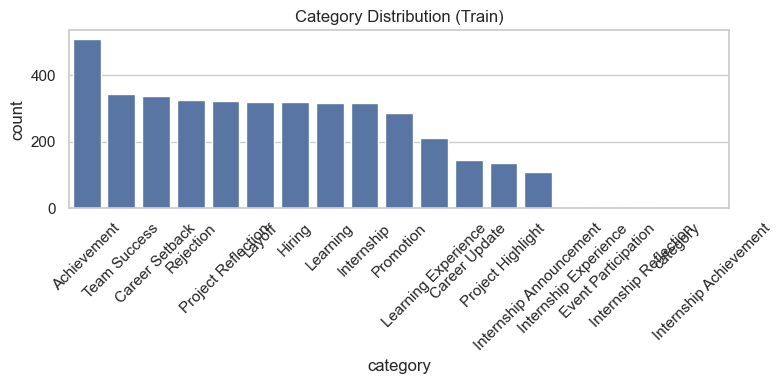

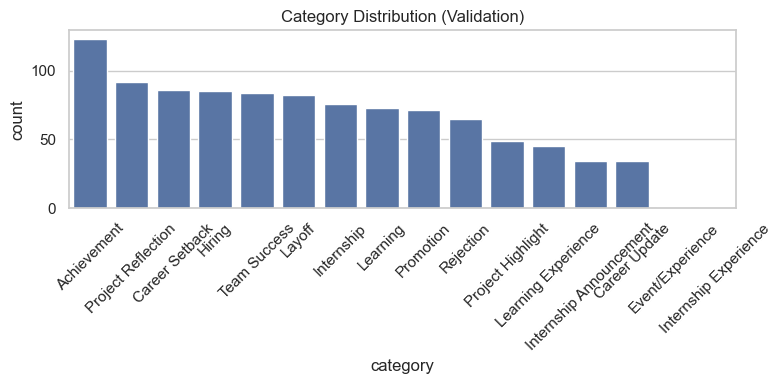

In [5]:
# Plot category distribution for train set
plt.figure(figsize=(8,4))
sns.countplot(data=train_df, x='category', order=train_df['category'].value_counts().index)
plt.title('Category Distribution (Train)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot category distribution for validation set
plt.figure(figsize=(8,4))
sns.countplot(data=val_df, x='category', order=val_df['category'].value_counts().index)
plt.title('Category Distribution (Validation)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Distribution of Tone

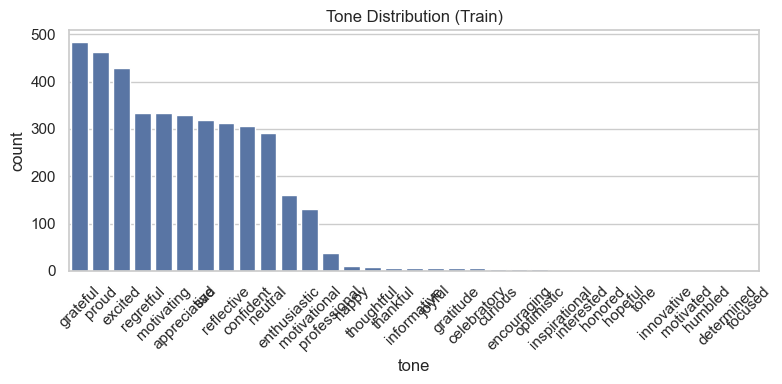

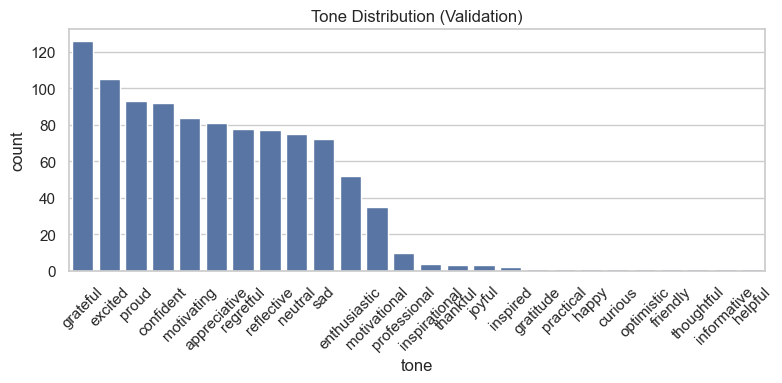

In [6]:
# Plot tone distribution for train set
plt.figure(figsize=(8,4))
sns.countplot(data=train_df, x='tone', order=train_df['tone'].value_counts().index)
plt.title('Tone Distribution (Train)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot tone distribution for validation set
plt.figure(figsize=(8,4))
sns.countplot(data=val_df, x='tone', order=val_df['tone'].value_counts().index)
plt.title('Tone Distribution (Validation)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Text Length Analysis

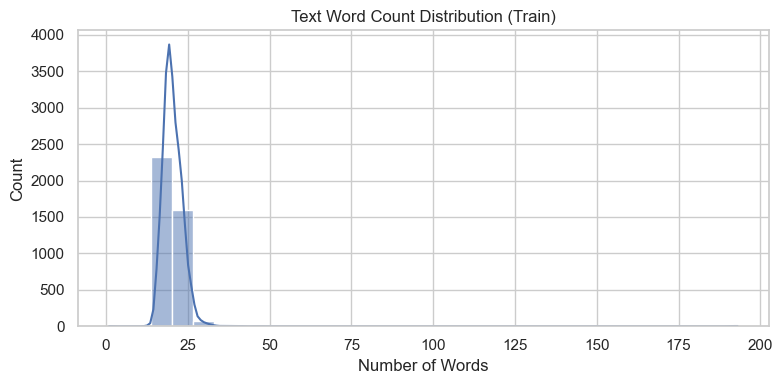

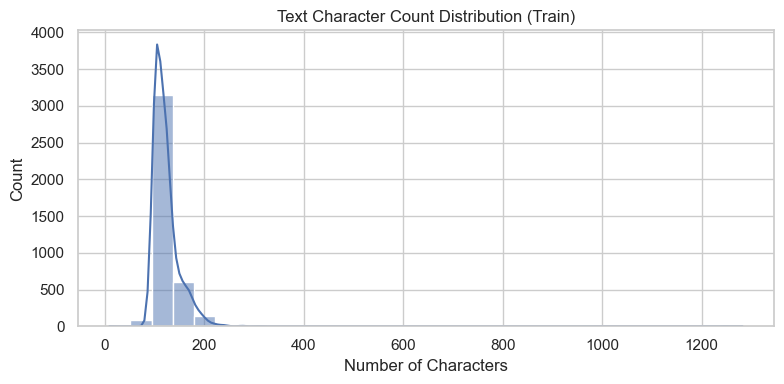

In [7]:
# Compute text lengths (number of words and characters)
train_df['text_word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))
train_df['text_char_count'] = train_df['text'].apply(lambda x: len(str(x)))

# Plot word count distribution
plt.figure(figsize=(8,4))
sns.histplot(train_df['text_word_count'], bins=30, kde=True)
plt.title('Text Word Count Distribution (Train)')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.show()

# Plot character count distribution
plt.figure(figsize=(8,4))
sns.histplot(train_df['text_char_count'], bins=30, kde=True)
plt.title('Text Character Count Distribution (Train)')
plt.xlabel('Number of Characters')
plt.tight_layout()
plt.show()

## 8. Category vs. Tone Crosstab

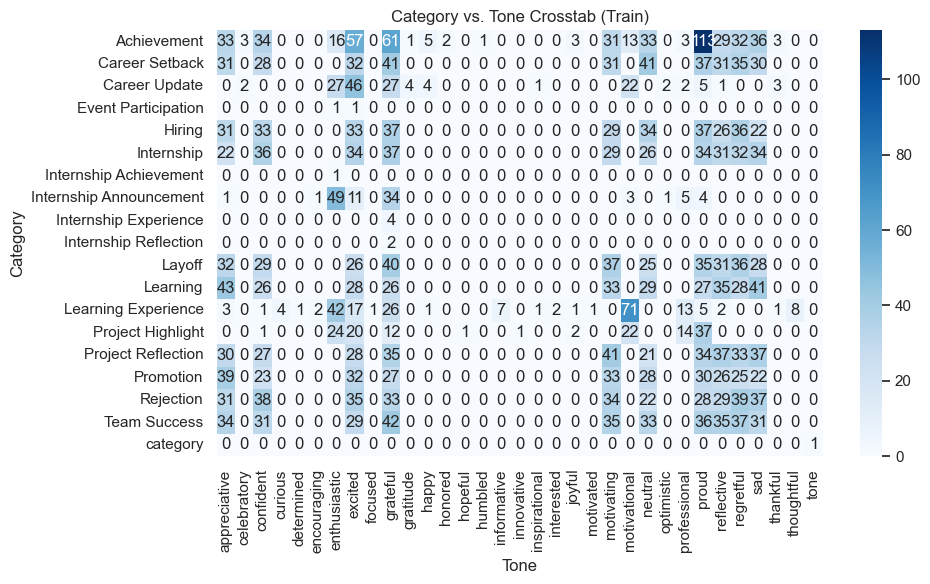

In [9]:
# Create crosstab of category vs. tone
crosstab = pd.crosstab(train_df['category'], train_df['tone'])
plt.figure(figsize=(10,6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Category vs. Tone Crosstab (Train)')
plt.ylabel('Category')
plt.xlabel('Tone')
plt.tight_layout()
plt.show()

## 9. Save Figures to Output Pane

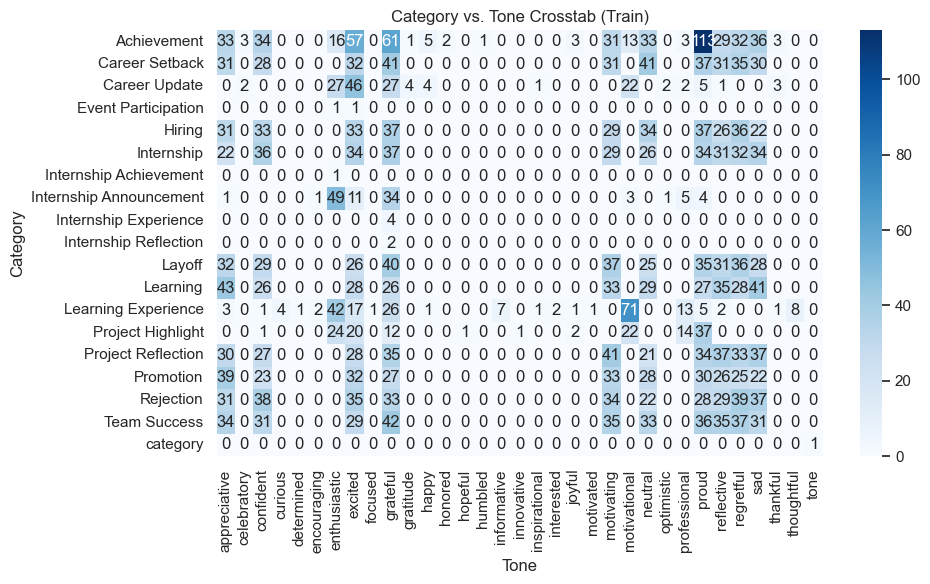

Figure saved to ../eda/figures\category_vs_tone_heatmap.png


In [10]:
# Example: Save last figure (heatmap) to file and display
output_dir = '../eda/figures'
os.makedirs(output_dir, exist_ok=True)
fig_path = os.path.join(output_dir, 'category_vs_tone_heatmap.png')
plt.figure(figsize=(10,6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Category vs. Tone Crosstab (Train)')
plt.ylabel('Category')
plt.xlabel('Tone')
plt.tight_layout()
plt.savefig(fig_path)
plt.show()
print(f'Figure saved to {fig_path}')